In [2]:
# Here I Imported Some Libriries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Here i am importing  dataset

df = pd.read_csv("traffic.csv")

In [4]:
# Preview the data
print(df.head())

   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ20

In [5]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [6]:
df.shape


(226278, 9)

In [7]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Total and Daily Pageview Events

In [8]:
# Here I Used Filter for 'click' events
click_events = df[df['event'] == 'click']

In [9]:
# Filter for 'click' events
click_events = df[df['event'] == 'click']

In [10]:
# Daily click events
daily_click_events = click_events.groupby('date').size()
avg_daily_click_events = daily_click_events.mean()
print(f"Average Daily Click Events: {avg_daily_click_events:.2f}")

Average Daily Click Events: 7961.71


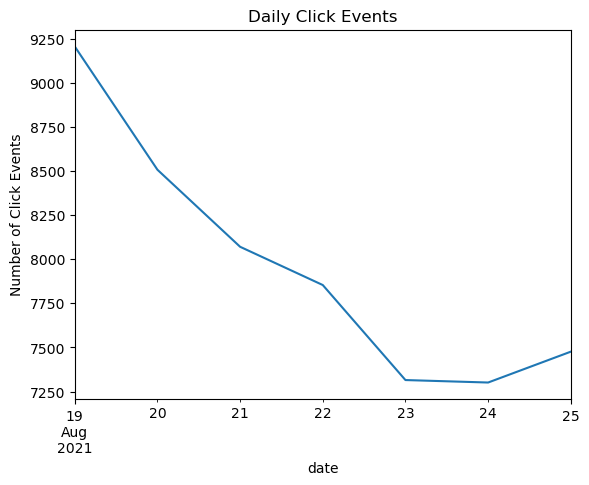

In [11]:
# Plot daily click events
daily_click_events.plot(kind='line', title='Daily Click Events')
plt.ylabel('Number of Click Events')
plt.show()

# 2. Plot geographical distribution

In [12]:
# 2. Geographical Distribution of Click Events
geo_distribution = click_events.groupby('country').size().sort_values(ascending=False)
print("\nGeographical Distribution (Top 5 countries):")
print(geo_distribution.head())


Geographical Distribution (Top 5 countries):
country
India            11609
United States     9533
Saudi Arabia      9495
France            4054
Iraq              1836
dtype: int64


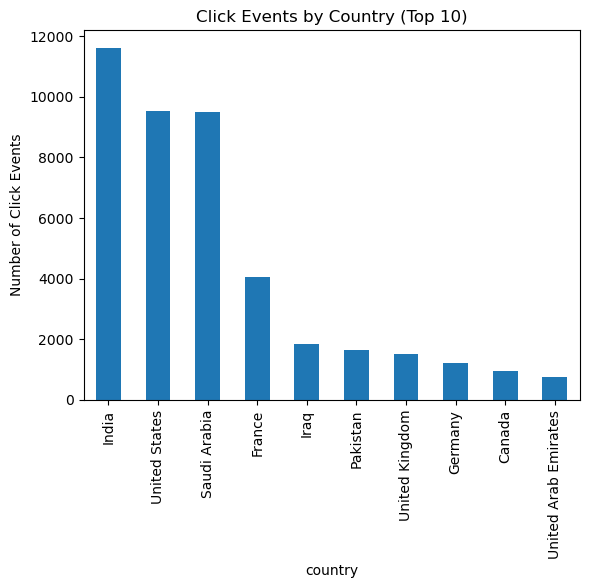

In [17]:

geo_distribution.head(10).plot(kind='bar', title='Click Events by Country (Top 10)')
plt.ylabel('Number of Click Events')
plt.show()

# 3. Click-Through Rate (CTR) by Link

In [15]:
ctr_by_link = click_events.groupby('linkid').size().sort_values(ascending=False)
print("\nClick Events by Link (Top 5 links):")
print(ctr_by_link.head())


Click Events by Link (Top 5 links):
linkid
2d896d31-97b6-4869-967b-1c5fb9cd4bb8    9692
e849515b-929d-44c8-a505-e7622f1827e9    2198
522da5cc-8177-4140-97a7-a84fdb4caf1c    2109
681d888a-59ce-4acb-b7c5-95dab0c063d9    1500
c2c876ab-b093-4750-9449-6b4913da6af3    1429
dtype: int64


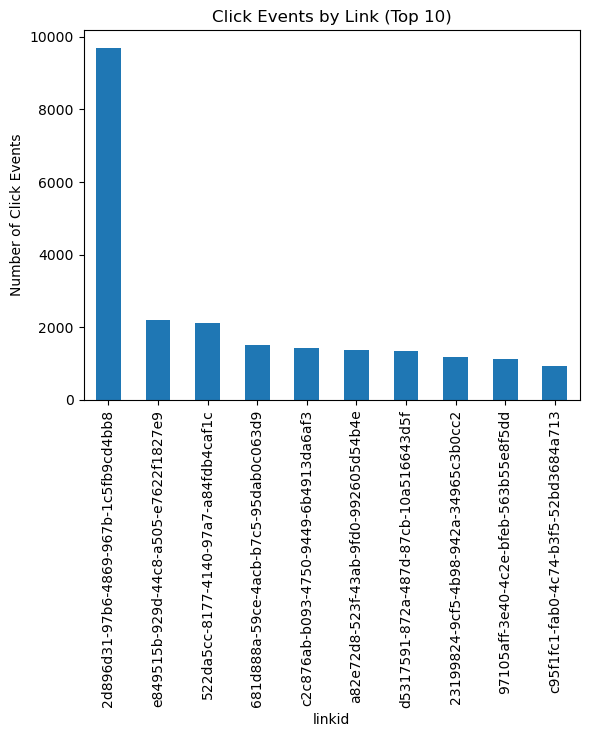

In [18]:
# Plot CTR by Link (Top 10 links)
ctr_by_link.head(10).plot(kind='bar', title='Click Events by Link (Top 10)')
plt.ylabel('Number of Click Events')
plt.show()

# 4. Correlation Analysis

In [20]:

# Hree i have explored relationships between categorical variables such as 'artist', 'album', 'track', or 'country'
# here i check how many clicks are associated with specific artists or albums
artist_clicks = click_events.groupby('artist').size().sort_values(ascending=False)
print("\nClick Events by Artist (Top 5 artists):")
print(artist_clicks.head())


Click Events by Artist (Top 5 artists):
artist
Tesher                                                          9692
Tundra Beats                                                    2198
Anne-Marie                                                      2172
Surf Mesa, Emilee                                               1589
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna    1500
dtype: int64


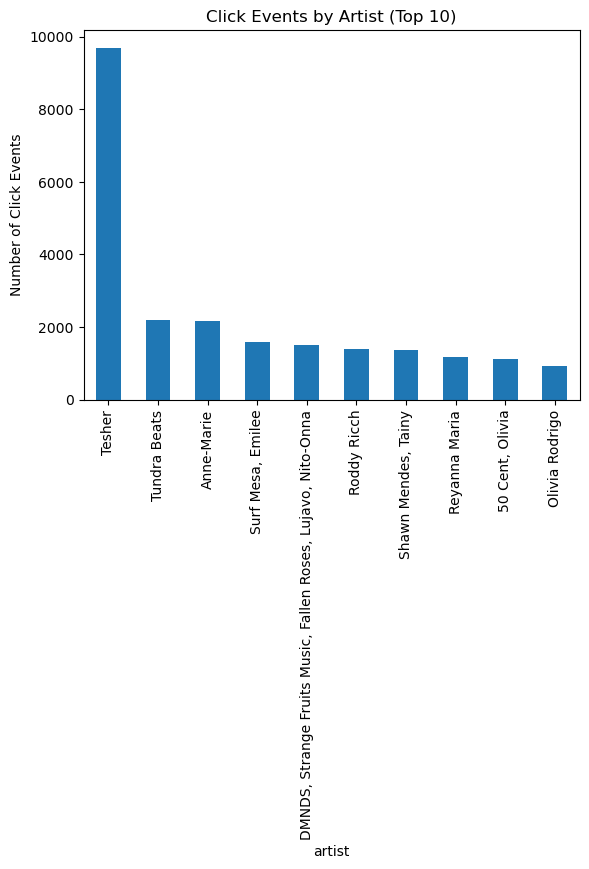

In [21]:
# Plot clicks by artist (Top 10)
artist_clicks.head(10).plot(kind='bar', title='Click Events by Artist (Top 10)')
plt.ylabel('Number of Click Events')
plt.show()